In [10]:
# -*- coding: utf-8 -*-
import numpy as np
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plot
import random

In [11]:
def get_datatrain():
    data = load_svmlight_file("C:/Users/Administrator/Desktop/a9a.txt")
    input_data = data[0].toarray()
    return input_data, data[1]
def get_datatest():
    data = load_svmlight_file("C:/Users/Administrator/Desktop/a9a.t")
    input_data = data[0].toarray()
    return input_data, data[1]
def sigmoid(w, X):
    return 1.0/(1.0+np.e**(-np.dot(X, w)))
def draw(Losstesting, algorithm, show=False):
    x = np.array(range(1, len(Losstesting)+1))
    plot.figure(0)
    plot.plot(x, np.array(Losstesting), label=algorithm)
    if show==True:
        plot.xlabel("iternum")
        plot.ylabel("Loss")
        plot.title("LinearClassiﬁcation")
        plot.grid(True)
        plot.legend()
        plot.show()

In [12]:
x_train, y_train = get_datatrain()
x_test, y_test = get_datatest()
lr=0.01
C=2**-1
D=123
batchsize=5000
temp = np.zeros((len(x_test), 1))
x_test = np.column_stack((x_test, temp))
y_train_accuracy = y_train.copy()
y_test_accuracy = y_test.copy()
train_column = np.zeros((len(x_train), 1))
x_train = np.column_stack((x_train, train_column))
test_column = np.zeros((len(x_test), 1))
x_test = np.column_stack((x_test, test_column))
algorithm = ['SGD', 'NAG', 'RMSProp', 'Adadelta', 'Adam']

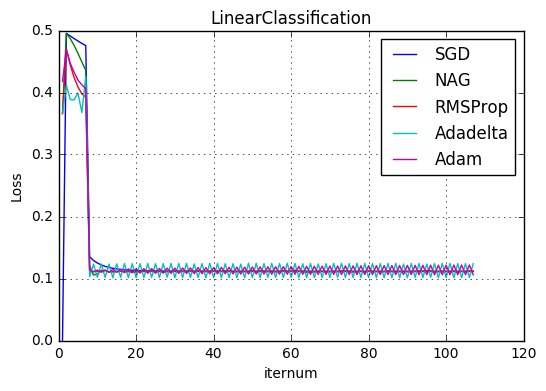

In [13]:
for a in range(len(algorithm)):
    w = np.zeros((D+1, 1))
    Ltrain = []
    Ltest = []
    Accuracytrain = []
    Accuracytest = []
    batchnum = int(len(x_train)/batchsize + 1)
    vtl = np.zeros((D+1, 1))
    gtl = 0
    deltat1 = np.zeros((D+1, 1))
    vtla = np.zeros((D+1, 1))
    mtl = np.zeros((D+1, 1))
    for i in range(100):
        Losstraining = 0.0
        Losstesting = 0.0
        Accuracytraining = 0.0
        Accuracytesting = 0.0
        suiji = random.sample(range(len(x_train)), len(x_train))
        for j in range(batchnum):
            if j!=batchnum-1:
                x = x_train[suiji[j*batchsize:(j+1)*batchsize]]
                y = y_train[suiji[j*batchsize:(j+1)*batchsize]]
            elif j==batchnum-1:
                x = x_train[suiji[j*batchsize:]]
                y = y_train[suiji[j*batchsize:]]
            if i==0:
                Ltrain.append(((1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(x_train))[0][0])
                Ltest.append(((1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(x_test))[0][0])
                Accuracytrain.append(Accuracytraining)
                Accuracytest.append(Accuracytesting)
            if algorithm[a]=="SGD":
                temp = 1 - (y.reshape(-1, 1) * np.dot(x, w))
                temp[temp<=0] = 0
                gradient = w - C * (np.dot(np.transpose(x), temp * y.reshape(-1, 1)))/len(x)
                w = w - lr * gradient
            elif algorithm[a]=="NAG":
                temp = 1 - (y.reshape(-1, 1) * np.dot(x, w-0.9*vtl))
                temp[temp<=0] = 0
                gradient = w - C * (np.dot(np.transpose(x), temp * y.reshape(-1, 1)))/len(x)
                vt = 0.9*vtl + lr * gradient
                w = w - vt
                vtl = vt.copy()
            elif algorithm[a]=="Adadelta":
                temp = 1 - (y.reshape(-1, 1) * np.dot(x, w))
                temp[temp<=0] = 0
                gradient = w - C * (np.dot(np.transpose(x), temp * y.reshape(-1, 1)))/len(x)
                gt = gradient.copy()
                gt = 0.1 * np.square(gtl) + 0.9 * np.square(gt)
                deltaw = (np.sqrt(np.mean(deltat1)+0.001)/np.sqrt(gt+0.001))*gradient
                w = w - deltaw
                deltat = 0.9 * deltat1 + 0.1 * np.square(deltaw)
                deltat1 = deltat.copy()
            elif algorithm[a]=="RMSProp":
                temp = 1 - (y.reshape(-1, 1) * np.dot(x, w))
                temp[temp<=0] = 0
                gradient = w - C * (np.dot(np.transpose(x), temp * y.reshape(-1, 1)))/len(x)
                g_t = 0.001 * np.square(gtl) + 0.999 * np.square(gradient)
                w = w - (lr*gradient)/np.sqrt(g_t+0.001)
                gtl = g_t.copy()
            elif algorithm[a]=="Adam":
                temp = 1 - (y.reshape(-1, 1) * np.dot(x, w))
                temp[temp<=0] = 0
                gradient = w - C * (np.dot(np.transpose(x), temp * y.reshape(-1, 1)))/len(x)
                mt = 0.9 * mtl + 0.1 * gradient
                vta = 0.999 * vtla + 0.001 * np.square(gradient)
                mthat = mt / ( 1 - np.power(0.9, i*batchnum+j+1))
                vtahat = vta / ( 1 - np.power(0.999, i*batchnum+j+1))
                w = w - lr * mthat / (np.sqrt(vtahat) + 1e-8)
                mt = mthat
                vt_a = vtahat
            temp = 1 - (y_train.reshape(-1, 1) * np.dot(x_train, w))
            temp[temp<=0] = 0
            Losstraining = ((1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(x_train))[0][0]
            Losstraining += Losstraining
            temp = 1 - (y_test.reshape(-1, 1) * np.dot(x_test, w))
            temp[temp<=0] = 0
            Losstesting = ((1.0/2) * (np.dot(np.transpose(w), w)) + C * np.sum(temp)/len(x_test))[0][0]
            Losstesting += Losstesting
        Losstraining = Losstraining/batchnum
        Losstesting = Losstesting/batchnum
        Ltrain.append(Losstraining)
        Ltest.append(Losstesting)
        hit = np.dot(x_train, w) * y_train_accuracy.reshape(-1, 1)
        Accuracytraining = float(len(hit[hit>0]))/len(hit)
        hit = np.dot(x_test, w) * y_test_accuracy.reshape(-1, 1)
        Accuracytesting = float(len(hit[hit>0]))/len(hit)
        Accuracytrain.append(Accuracytraining)
        Accuracytest.append(Accuracytesting)
    if a==len(algorithm)-1:
        draw(Ltest, algorithm[a], show=True)
    else:
        draw(Ltest, algorithm[a], show=False)